# 09_Dataset Aggregation
In notebooks 1 through 8 I analyzed the various provided raw datasets and then selected and created various features that were saved to a coresponding pre-processed dataset. In this notebook I combined all the pre-processed dataset into one and then save it to file.

Also after visualizing the probability by target of some of the fields I decided to remove them as feature since there was not much of difference between defaults and non-defaults.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 9.1 Import data and overview data

In [2]:
bureau = pd.read_csv(r"C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\results\1_1_bureau.csv")
pos = pd.read_csv(r"C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\results\1_2_pos_balances.csv")
cc = pd.read_csv(r"C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\results\1_3_cc_balances.csv")
ins = pd.read_csv(r"C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\results\1_4_installment_payments.csv")
prev = pd.read_csv(r"C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\results\1_5_previous_applications.csv")
app_con = pd.read_csv(r"C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\results\1_6_applications_continuous.csv")
app_int = pd.read_csv(r"C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\results\1_7_applications_integer_types.csv")
app_str = pd.read_csv(r"C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\results\1_8_applications_string_types.csv")

In [3]:
# aggregate all tables
for i in [bureau,pos, cc, ins, prev, app_con, app_str]:
    app_int = app_int.merge(i,
                            how='left', 
                            on='SK_ID_CURR',
                            validate='one_to_one')

In [7]:
dataset = app_int.copy()
del bureau, pos, cc, ins, prev, app_con, app_str

In [10]:
# drop some TARGET columns due to aggregate tables
dataset.drop(['TARGET_x','TARGET_y'], axis=1, inplace=True) 

In [11]:
dataset.dtypes.value_counts()

float64    233
int64       21
object      12
dtype: int64

In [17]:
# set train dataset
train_df = dataset[dataset.TARGET.isna() == False]

### 9.1(a) Float types
- These fields came from the various pre-processed datasets.

In [15]:
float_col = dataset.select_dtypes(['float']).columns
float_table = dataset[float_col]
float_table.describe().T

,count,mean,std,min,25%,50%,75%,max
BUREAU_COUNT_GROUP,305811.0,1.702633,0.843784,1.000000,1.000000,1.000000,2.000000,4.000000
BUREAU_OVERDUE,305811.0,1.012635,0.111694,1.000000,1.000000,1.000000,1.000000,2.000000
BUREAU_DEBT_OVER_50%,305811.0,2.056568,1.163398,1.000000,1.000000,2.000000,3.000000,6.000000
BUREAU_DEBT_OVER_75%,305811.0,1.762893,0.970945,1.000000,1.000000,1.000000,2.000000,5.000000
BUREAU_DEBT_OVER_100%,305811.0,1.129596,0.375389,1.000000,1.000000,1.000000,1.000000,3.000000
...,...,...,...,...,...,...,...,...
CREDIT_INCOME_PERCENT,344610.0,1.261085,0.780659,-2.107417,0.726990,1.245823,1.799871,5.143301
ANNUITY_INCOME_PERCENT,344610.0,-1.492042,0.344608,-3.086746,-1.718439,-1.494496,-1.259619,0.763055
CREDIT_TERM,344610.0,-6.611633,1.567060,-10.644943,-7.756227,-6.569516,-5.447280,-3.538433
DAYS_EMPLOYED_PERCENT,344610.0,0.115012,0.112126,0.000000,0.021614,0.085821,0.175879,0.547434


In [28]:
for i in float_col:
    print(i)

BUREAU_COUNT_GROUP
BUREAU_OVERDUE
BUREAU_DEBT_OVER_50%
BUREAU_DEBT_OVER_75%
BUREAU_DEBT_OVER_100%
BUREAU_ACTIVE
BUREAU_CLOSED
BUREAU_ADVERSE
BUREAU_CREDIT_TYPE_COUNT
BUREAU_DAYS_CREDIT_MIN
BUREAU_DAYS_CREDIT_MAX
BUREAU_DAYS_CREDIT_MEAN
BUREAU_DAYS_CREDIT_STD
BUREAU_CREDIT_DAY_OVERDUE_MIN
BUREAU_CREDIT_DAY_OVERDUE_MAX
BUREAU_CREDIT_DAY_OVERDUE_MEAN
BUREAU_CREDIT_DAY_OVERDUE_STD
BUREAU_DAYS_CREDIT_ENDDATE_MIN
BUREAU_DAYS_CREDIT_ENDDATE_MAX
BUREAU_DAYS_CREDIT_ENDDATE_MEAN
BUREAU_DAYS_CREDIT_ENDDATE_STD
BUREAU_DAYS_ENDDATE_FACT_MIN
BUREAU_DAYS_ENDDATE_FACT_MAX
BUREAU_DAYS_ENDDATE_FACT_MEAN
BUREAU_DAYS_ENDDATE_FACT_STD
BUREAU_AMT_CREDIT_MAX_OVERDUE_MIN
BUREAU_AMT_CREDIT_MAX_OVERDUE_MAX
BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN
BUREAU_AMT_CREDIT_MAX_OVERDUE_STD
BUREAU_CNT_CREDIT_PROLONG_MIN
BUREAU_CNT_CREDIT_PROLONG_MAX
BUREAU_CNT_CREDIT_PROLONG_MEAN
BUREAU_CNT_CREDIT_PROLONG_STD
BUREAU_AMT_CREDIT_SUM_MIN
BUREAU_AMT_CREDIT_SUM_MAX
BUREAU_AMT_CREDIT_SUM_MEAN
BUREAU_AMT_CREDIT_SUM_STD
BUREAU_AMT_CRED

### 9.1(b) Integer Types
- The integers types are categorical features represented by integer values.
- These fields came from the applications datatset.

In [16]:
int_col = dataset.select_dtypes(['integer']).columns
int_table = dataset[int_col]
int_table.describe().T

,count,mean,std,min,25%,50%,75%,max
RETIRED,356255.0,0.181466,0.385404,0.0,0.0,0.0,0.0,1.0
SK_ID_CURR,356255.0,278128.000000,102842.104413,100001.0,189064.5,278128.0,367191.5,456255.0
CNT_CHILDREN,356255.0,0.414316,0.720378,0.0,0.0,0.0,1.0,20.0
DAYS_BIRTH,356255.0,-16041.248841,4358.803980,-25229.0,-19676.0,-15755.0,-12425.0,-7338.0
DAYS_EMPLOYED,356255.0,-1961.780710,2305.224568,-17912.0,-2781.0,-1224.0,-290.0,0.0
DAYS_ID_PUBLISH,356255.0,-3002.071163,1517.901735,-7197.0,-4318.0,-3252.0,-1717.0,0.0
FLAG_EMP_PHONE,356255.0,0.818498,0.385434,0.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,356255.0,0.200098,0.400074,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,356255.0,0.278612,0.448317,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,356255.0,0.071213,0.257181,0.0,0.0,0.0,0.0,1.0


In [27]:
train_df['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
10         2
12         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

---------------------------------------------------------------------------------------------------- 
 RETIRED


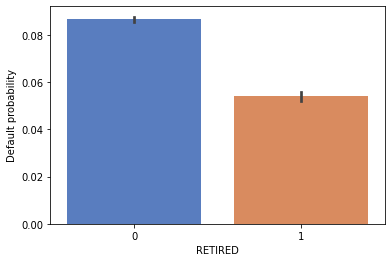

---------------------------------------------------------------------------------------------------- 
 CNT_CHILDREN


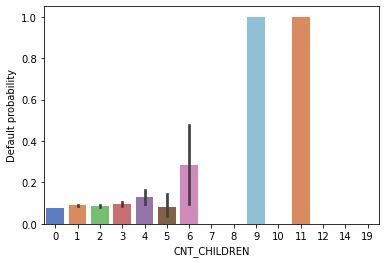

---------------------------------------------------------------------------------------------------- 
 FLAG_EMP_PHONE


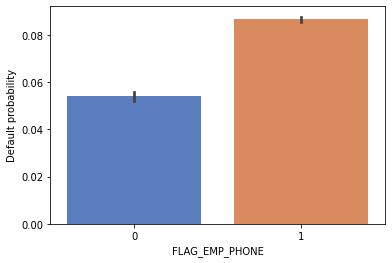

---------------------------------------------------------------------------------------------------- 
 FLAG_WORK_PHONE


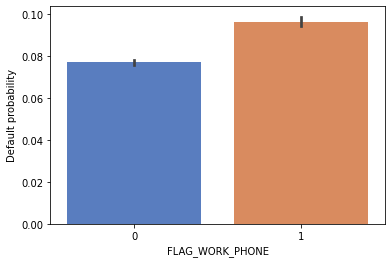

---------------------------------------------------------------------------------------------------- 
 FLAG_PHONE


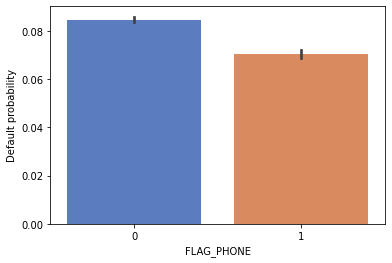

---------------------------------------------------------------------------------------------------- 
 FLAG_EMAIL


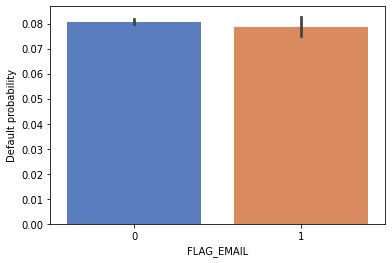

---------------------------------------------------------------------------------------------------- 
 REGION_RATING_CLIENT


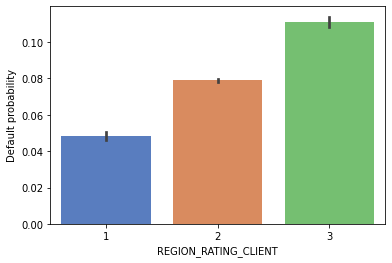

---------------------------------------------------------------------------------------------------- 
 REGION_RATING_CLIENT_W_CITY


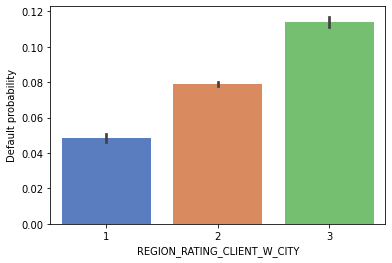

---------------------------------------------------------------------------------------------------- 
 HOUR_APPR_PROCESS_START


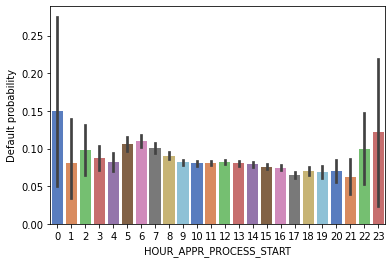

---------------------------------------------------------------------------------------------------- 
 REG_REGION_NOT_WORK_REGION


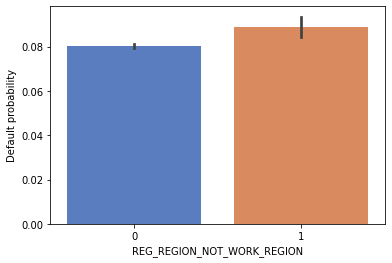

---------------------------------------------------------------------------------------------------- 
 LIVE_REGION_NOT_WORK_REGION


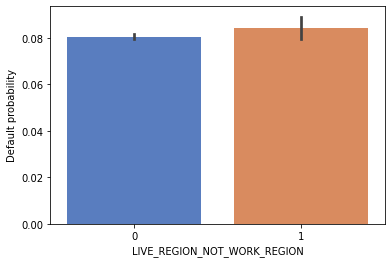

---------------------------------------------------------------------------------------------------- 
 REG_CITY_NOT_LIVE_CITY


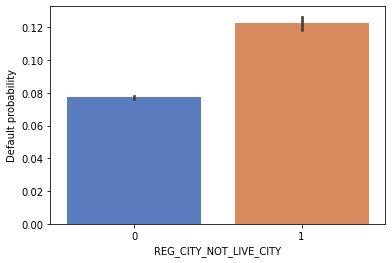

---------------------------------------------------------------------------------------------------- 
 REG_CITY_NOT_WORK_CITY


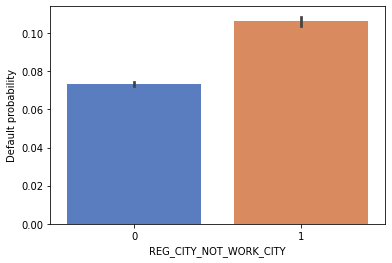

---------------------------------------------------------------------------------------------------- 
 LIVE_CITY_NOT_WORK_CITY


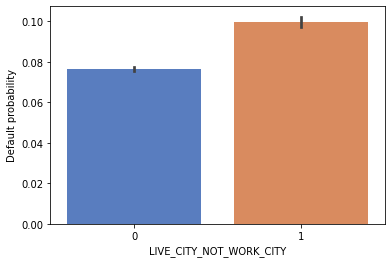

---------------------------------------------------------------------------------------------------- 
 FLAG_DOCUMENT_3


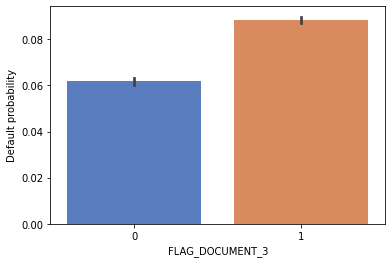

---------------------------------------------------------------------------------------------------- 
 FLAG_DOCUMENT_6


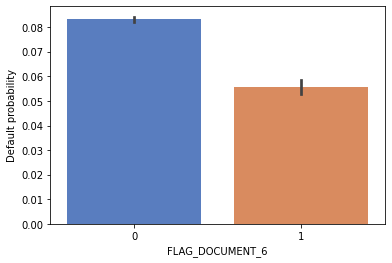

---------------------------------------------------------------------------------------------------- 
 FLAG_DOCUMENT_8


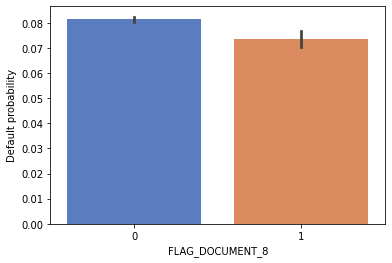

In [24]:
not_cat_features = ['SK_ID_CURR','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH']
for i in int_table.columns:
    if i not in not_cat_features:
        print("-"*100, "\n", i)
        ax = sns.barplot(x=i, y="TARGET", data=train_df, palette="muted")
        ax.set(ylabel = 'Default probability')
        plt.show()

In [40]:
#exclude some fields as features fields
exclude_feature_ints = []

exclude_feature_ints.append('CNT_CHILDREN')
exclude_feature_ints.append('CNT_FAM_MEMBERS')
exclude_feature_ints.append('OBS_60_CNT_SOCIAL_CIRCLE')
exclude_feature_ints.append('FLAG_EMAIL')
exclude_feature_ints.append('LIVE_REGION_NOT_WORK_REGION')
exclude_feature_ints.append('BUREAU_CREDIT_TYPE_COUNT')

### 9.1(c) String Types
The string types are categorical features that all came from the applications dataset.

In [29]:
cat_col = dataset.select_dtypes(['object']).columns
other_table = dataset[cat_col]
other_table.describe().T

,count,unique,top,freq
INSTLL_PAY_PAYMENT_GRADE,339587,5,Good,227941
NAME_CONTRACT_TYPE,356255,2,Cash loans,326537
CODE_GENDER,356255,3,F,235126
FLAG_OWN_CAR,356255,2,N,235235
FLAG_OWN_REALTY,356255,2,Y,246970
NAME_TYPE_SUITE,356255,7,Unaccompanied,290456
NAME_INCOME_TYPE,356255,8,Working,183307
NAME_EDUCATION_TYPE,356255,5,Secondary / secondary special,252379
NAME_FAMILY_STATUS,356255,6,Married,228715
NAME_HOUSING_TYPE,356255,6,House / apartment,316513


---------------------------------------------------------------------------------------------------- 
 INSTLL_PAY_PAYMENT_GRADE


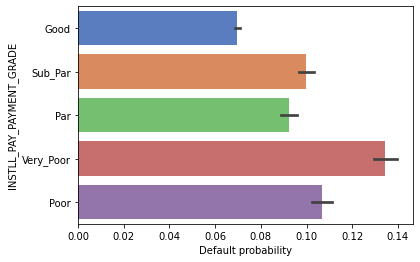

---------------------------------------------------------------------------------------------------- 
 NAME_CONTRACT_TYPE


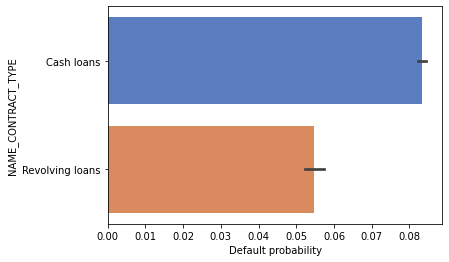

---------------------------------------------------------------------------------------------------- 
 CODE_GENDER


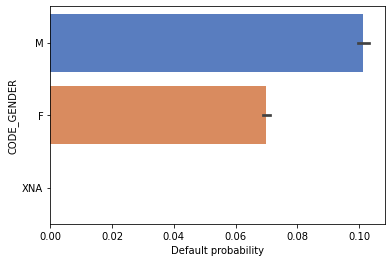

---------------------------------------------------------------------------------------------------- 
 FLAG_OWN_CAR


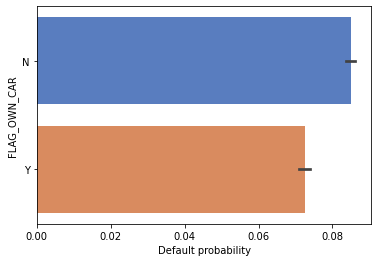

---------------------------------------------------------------------------------------------------- 
 FLAG_OWN_REALTY


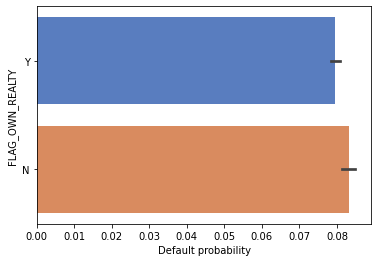

---------------------------------------------------------------------------------------------------- 
 NAME_TYPE_SUITE


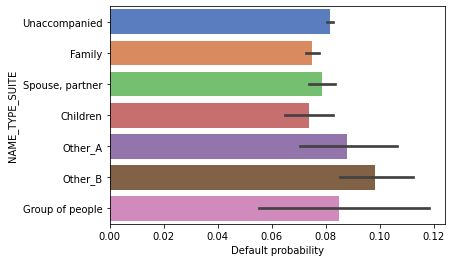

---------------------------------------------------------------------------------------------------- 
 NAME_INCOME_TYPE


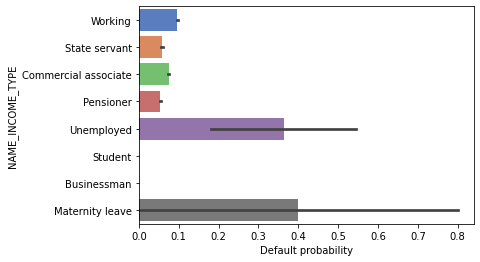

---------------------------------------------------------------------------------------------------- 
 NAME_EDUCATION_TYPE


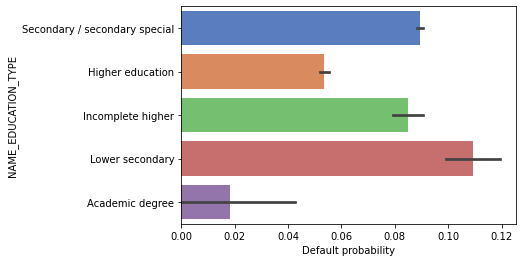

---------------------------------------------------------------------------------------------------- 
 NAME_FAMILY_STATUS


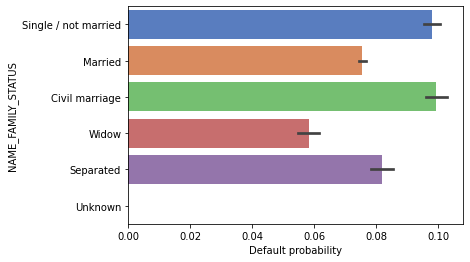

---------------------------------------------------------------------------------------------------- 
 NAME_HOUSING_TYPE


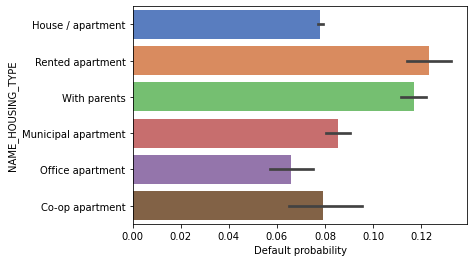

---------------------------------------------------------------------------------------------------- 
 WEEKDAY_APPR_PROCESS_START


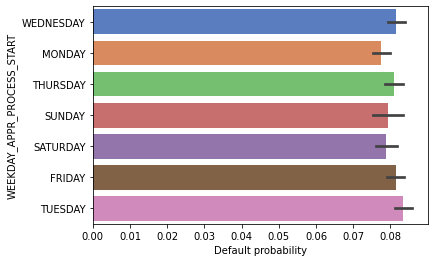

In [34]:
for i in cat_col:
    if i not in ['ORGANIZATION_TYPE']:
        print("-"*100, "\n", i)
        ax = sns.barplot(x="TARGET", y=i, data=train_df, palette="muted")
        ax.set(xlabel = 'Default probability')
        plt.show()

---------------------------------------------------------------------------------------------------- 
 INSTLL_PAY_PAYMENT_GRADE


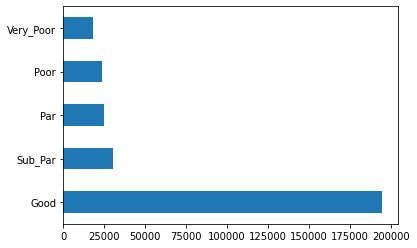

---------------------------------------------------------------------------------------------------- 
 NAME_CONTRACT_TYPE


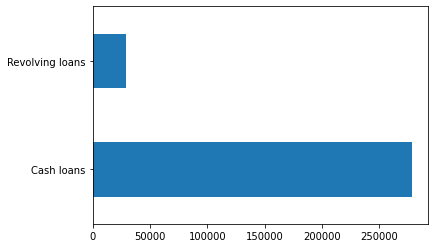

---------------------------------------------------------------------------------------------------- 
 CODE_GENDER


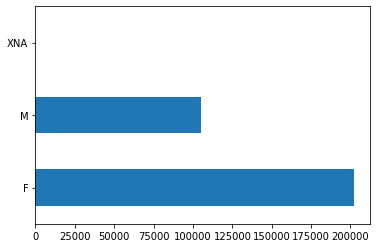

---------------------------------------------------------------------------------------------------- 
 FLAG_OWN_CAR


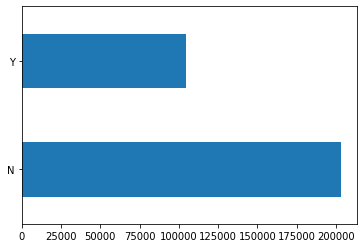

---------------------------------------------------------------------------------------------------- 
 FLAG_OWN_REALTY


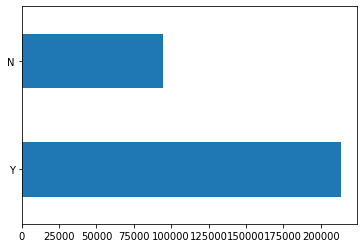

---------------------------------------------------------------------------------------------------- 
 NAME_TYPE_SUITE


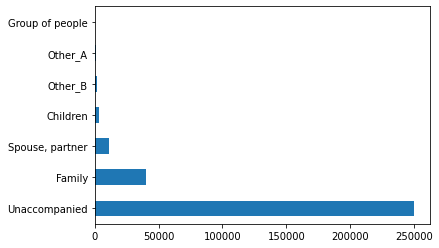

---------------------------------------------------------------------------------------------------- 
 NAME_INCOME_TYPE


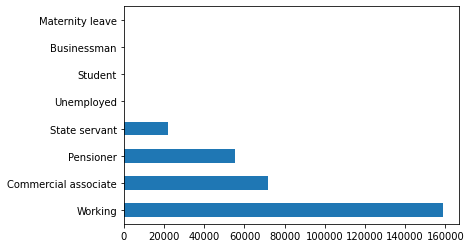

---------------------------------------------------------------------------------------------------- 
 NAME_EDUCATION_TYPE


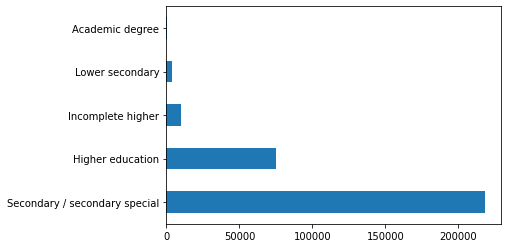

---------------------------------------------------------------------------------------------------- 
 NAME_FAMILY_STATUS


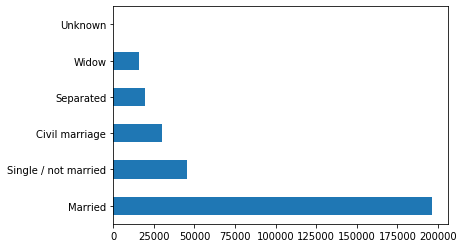

---------------------------------------------------------------------------------------------------- 
 NAME_HOUSING_TYPE


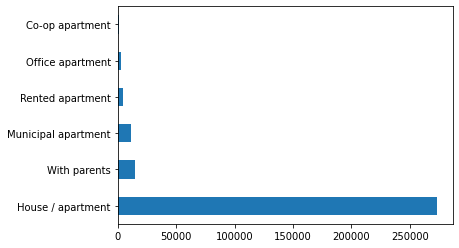

---------------------------------------------------------------------------------------------------- 
 WEEKDAY_APPR_PROCESS_START


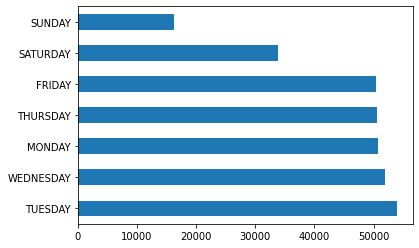

In [36]:
# lets plot the fields but excluded 'ORGANIZATION_TYPE'  since it has a lot of different values
# 'ORGANIZATION_TYPE' will be plotted seperately
# this plot count by each category
for i in cat_col:
    if i not in ['ORGANIZATION_TYPE']:
        print("-"*100, "\n", i)
        train_df[i].value_counts().plot.barh()
        plt.show()

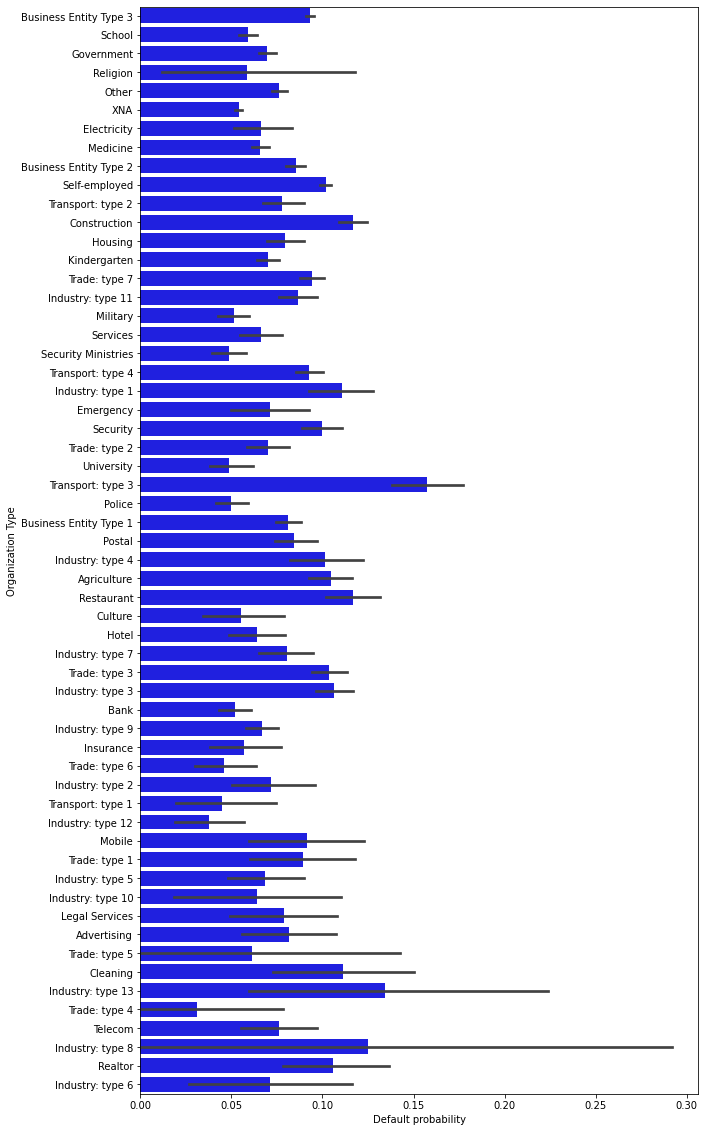

In [37]:
#plot 'ORGANIZATION_TYPE' 
f, ax = plt.subplots(figsize=(10, 20))

# cnt = dataset.groupby('ORGANIZATION_TYPE').size()
sns.barplot(y='ORGANIZATION_TYPE',x='TARGET', data=train_df, color="b", ax=ax)
# ax.set_xticklabels(['{:,.0f}'.format(x) for x in ax.get_xticks()])

ax.set_xlabel("Default probability")
ax.set_ylabel('Organization Type')

plt.show()

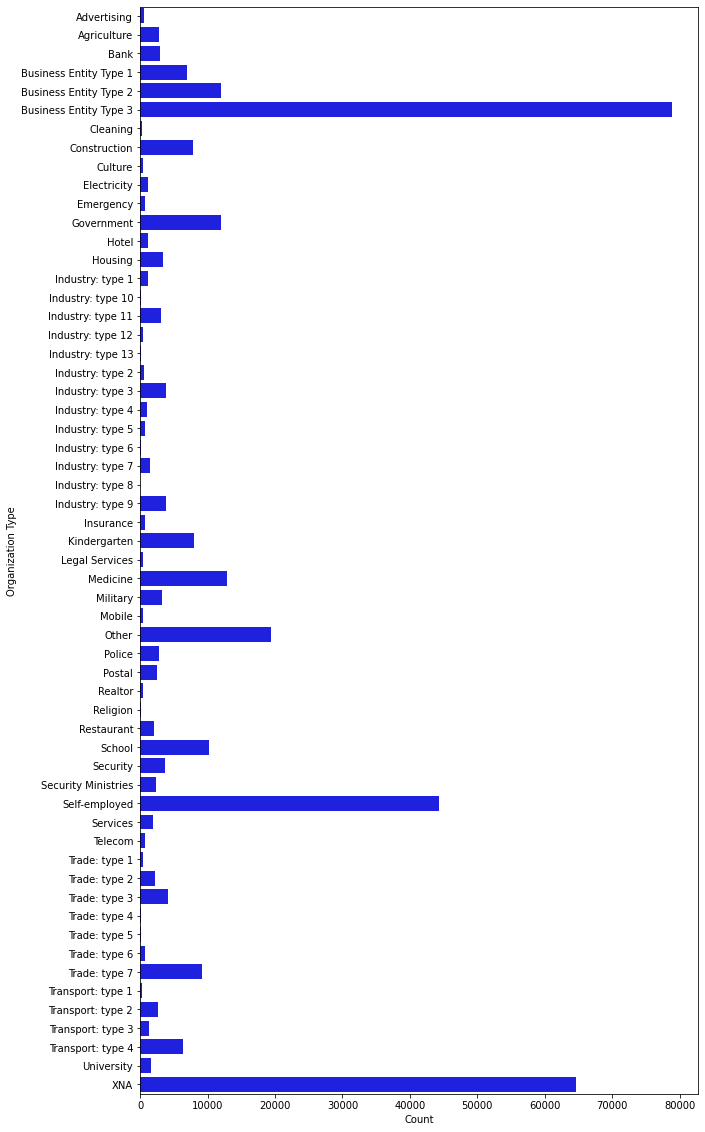

In [39]:
#plot 'ORGANIZATION_TYPE' 
f, ax = plt.subplots(figsize=(10, 20))

cnt = dataset.groupby('ORGANIZATION_TYPE').size()
sns.barplot(y=cnt.index,x=cnt.values, color="b", ax=ax)
# ax.set_xticklabels(['{:,.0f}'.format(x) for x in ax.get_xticks()])

ax.set_xlabel('Count')
ax.set_ylabel('Organization Type')

plt.show()

In [41]:
exclude_features_other = []

exclude_features_other.append('FLAG_OWN_REALTY')
exclude_features_other.append('NAME_TYPE_SUITE')
exclude_features_other.append('WEEKDAY_APPR_PROCESS_START')
exclude_features_other.append('ORGANIZATION_TYPE')

## 9.2 Final Featues
Create list of final features

In [42]:
#get features we want to exclude.
exclude_f = exclude_feature_ints + exclude_features_other

final_features = [f for f in dataset.columns  if f not in exclude_f ]
print("Final features count {}.".format(len(final_features)))

Final features count 256.


In [ ]:
dataset[final_features].to_csv(r'C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\results\1_9_combined_dataset.csv',index=False)
print("Dataset saved to file.")